# Dummy classifiers and decision trees

In this section we will fit models (LinearSVC, SVC and Decision Tree) to predict whether a car can be sold based on mileage per year, model year and price.

We will also use dummy classifiers to create our baselines and be able to evaluate our results.

In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
# Modifying the values for the sold column
to_change = {
    'yes': 1,
    'no': 0
}
data.sold = data.sold.map(to_change)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [3]:
# Creating a column for the age of the car
from datetime import datetime

# current_year = datetime.today().year
current_year = 2018
data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,18
1,1,7843,1998,40557.96,1,20
2,2,7109,2006,89627.50,0,12
3,3,26823,2015,95276.14,0,3
4,4,7935,2014,117384.68,1,4


In [4]:
# Creating a new column for km per year
mile_to_km = 1.60934
data['km_per_year'] = data.mileage_per_year * mile_to_km
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,18,35085.22134
1,1,7843,1998,40557.96,1,20,12622.05362
2,2,7109,2006,89627.50,0,12,11440.79806
3,3,26823,2015,95276.14,0,3,43167.32682
4,4,7935,2014,117384.68,1,4,12770.11290


In [5]:
# Finally, we can drop the comuns that we don't need anymore
# we need to pass the axis=1 parameter to drop columns because the default is to drop rows
data = data.drop(columns=['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [6]:
#Defining the x and y data
x = data[['price', 'model_age', 'km_per_year']]
y = data['sold']

## Separating the data into train and test

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Setting the seed for the random number generator
SEED = 5
np.random.seed(SEED)

# Splitting
raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size=0.25,
    stratify=y
)

print(f'Training with {len(raw_train_x)} elements and testing with {len(raw_test_x)} elements')

Training with 7500 elements and testing with 2500 elements


## Creating baselines
### 1 - Stratified dummy

In [8]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(raw_train_x, train_y)

# Calculating the dummy accuracy
accuracy_stratified = dummy_stratified.score(raw_test_x, test_y) * 100
print(f'Dummy (Stratified) Accuracy: {accuracy_stratified:.2f}%')

Dummy (Stratified) Accuracy: 51.00%


### 2 - Most Frequent dummy

In [9]:
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(raw_train_x, train_y)

# Calculating the accuracy
accuracy_most_frequent = dummy_most_frequent.score(raw_test_x, test_y) * 100
print(f'Dummy (Most Frequent) Accuracy: {accuracy_most_frequent:.2f}%')

Dummy (Most Frequent) Accuracy: 58.00%


## Using LinearSVC model:

In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Creating and training the model
# setting dual=False to speed up the training process
model = LinearSVC(dual=False)
model.fit(raw_train_x, train_y)

# Making the forecast
forecast = model.predict(raw_test_x)

# Calculating the accuracy
accuracy = accuracy_score(test_y, forecast) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 62.48%


## Using SVC model

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(train_x, train_y)

forecast = model.predict(test_x)

accuracy = accuracy_score(test_y, forecast) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 77.48%


In the past models (LinearSVC and SVC) we were not able to see why the decisions were made since they are blackbox models.

So, if we want to see what is leading to our models decision, we can use other modelling methods as the decision tree classifier:

## Using the Decision Tree Classifier

Modelling our data:

In [25]:
from sklearn.tree import DecisionTreeClassifier 

tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(raw_train_x, train_y)

forecast = tree_model.predict(raw_test_x)

accuracy = accuracy_score(test_y, forecast) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 79.28%


Exporting the gaph visualization:

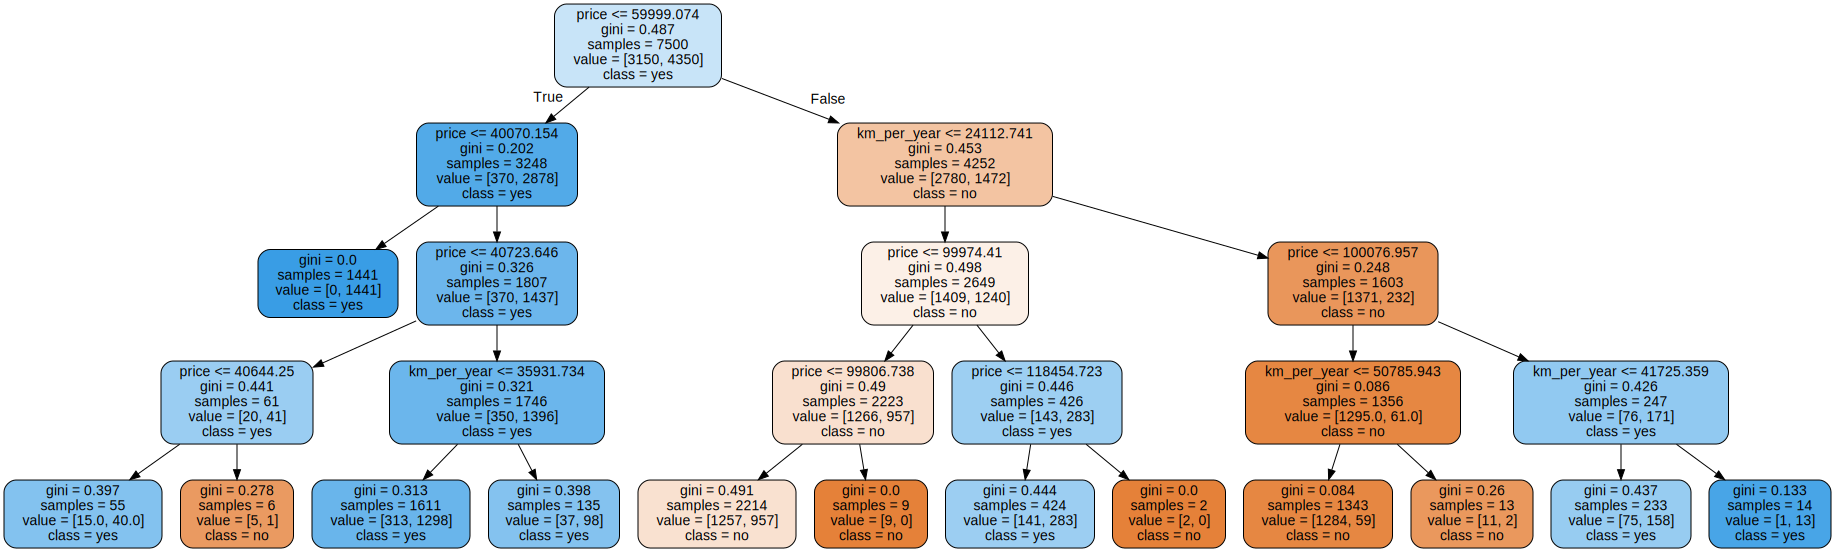

In [26]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=features,
    class_names=['no', 'yes']
    )
graph = graphviz.Source(dot_data)
graph